In [204]:
import os
import pandas as pd
import numpy as np
os.chdir("E:/1 M A B A/Mining Gan/FinaPro")
df = pd.read_csv("osi.csv")

In [205]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [206]:
df = df.rename(columns={'Administrative_Duration': 'AD', 
                         'Informational_Duration': 'ID',
                         'OperatingSystems': 'OS', 
                         'ProductRelated_Duration': 'PRD'})


In [207]:
df = df.drop_duplicates()

In [208]:
df

,Administrative,AD,Informational,ID,ProductRelated,PRD,BounceRates,ExitRates,PageValues,SpecialDay,Month,OS,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Pembuatan Shiny

In [209]:
'''import shiny
from shiny import App, ui, render, reactive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the working directory and load the data
os.chdir("E:/1 M A B A/Mining Gan/FinaPro")
data = pd.read_csv("osi.csv")

data = data.astype({
    'OperatingSystems' : 'object',
    'Browser' : 'object',
    'Region' : 'object',
    'TrafficType' : 'object'
})

# Define UI
app_ui = ui.page_fluid(
    ui.input_select("variable", "Select Variable", choices=data.columns.tolist()),
    ui.output_table("summary"),  # Display summary as a table
    ui.output_plot("plot")  # Display plot
)

# Define Server logic
def server(input, output, session):

    # Reactive expression to return selected data
    @reactive.Calc
    def selected_data():
        return data[input.variable()]  # Input variable selection

    # Summary Statistics (output as a table)
    @output
    @render.table  # Use render.table to show data in a table format
    def summary():
        selected = selected_data()
        if selected.dtype == 'object':  # For categorical data (strings)
            return selected.value_counts().reset_index().rename(columns={'index': 'Category', 0: 'Count'})
        elif selected.dtype == 'bool':  # For boolean data (True/False)
            return selected.value_counts().reset_index().rename(columns={'index': 'Category', 0: 'Count'})
        else:  # For numerical data
            return selected.describe().reset_index().rename(columns={'index': 'Statistic', 0: 'Value'})

    # Visualization (Bar plot for 0 and 1 and histogram for numerical data)
    @output
    @render.plot
    def plot():
        selected = selected_data()
        
        plt.figure(figsize=(6, 4))
        
        # Handle categorical data with 0 and 1 (binary data)
        if selected.dtype == 'bool' or selected.nunique() == 2:  # Handle binary or boolean data
            sns.countplot(x=selected)
            plt.title(f"Bar Plot of {input.variable()} (0 vs 1)")

        # Handle other categorical data (strings)
        elif selected.dtype == 'object':  # For categorical data
            sns.countplot(x=selected)
            plt.title(f"Bar Plot of {input.variable()}")

        # Handle numerical data (histogram)
        else:  # For numerical data
            sns.histplot(selected, kde=True)
            plt.title(f"Histogram of {input.variable()}")

        plt.tight_layout()
        return plt.gcf()  # Return the current figure to display in the plot

# Create the Shiny app
app = App(app_ui, server)

# Run the app
if __name__ == "__main__":
    app.run()'''


'import shiny\nfrom shiny import App, ui, render, reactive\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport os\n\n# Set the working directory and load the data\nos.chdir("E:/1 M A B A/Mining Gan/FinaPro")\ndata = pd.read_csv("osi.csv")\n\ndata = data.astype({\n    \'OperatingSystems\' : \'object\',\n    \'Browser\' : \'object\',\n    \'Region\' : \'object\',\n    \'TrafficType\' : \'object\'\n})\n\n# Define UI\napp_ui = ui.page_fluid(\n    ui.input_select("variable", "Select Variable", choices=data.columns.tolist()),\n    ui.output_table("summary"),  # Display summary as a table\n    ui.output_plot("plot")  # Display plot\n)\n\n# Define Server logic\ndef server(input, output, session):\n\n    # Reactive expression to return selected data\n    @reactive.Calc\n    def selected_data():\n        return data[input.variable()]  # Input variable selection\n\n    # Summary Statistics (output as a table)\n    @output\n    @render.table  # 

Jalankan syntax di Python untuk mendapatkan Summary Statistics dan Visualisasi. Lanjut ke Feature Selection/Extraction

## Feature Selection/Extraction

- Analisis Korelasi

Korelasi antar fitur

In [210]:
x = pd.DataFrame(df, columns = df.columns)
y = pd.Series(df.columns, name = 'target')
corre_mtrx = x.corr()
print("Matrix Korelasi Antar Fitur:\n", corre_mtrx)

Matrix Korelasi Antar Fitur:
                 Administrative        AD  Informational        ID  \
Administrative        1.000000  0.600457       0.375256  0.254813   
AD                    0.600457  1.000000       0.301419  0.237211   
Informational         0.375256  0.301419       1.000000  0.618648   
ID                    0.254813  0.237211       0.618648  1.000000   
ProductRelated        0.428305  0.286863       0.372572  0.279082   
PRD                   0.371146  0.353583       0.386052  0.346596   
BounceRates          -0.213096 -0.136913      -0.109095 -0.069878   
ExitRates            -0.311255 -0.201971      -0.159429 -0.102852   
PageValues            0.097017  0.066228       0.047406  0.030090   
SpecialDay           -0.096951 -0.074666      -0.049350 -0.031261   
OS                   -0.006586 -0.007529      -0.009721 -0.009734   
Browser              -0.025622 -0.015742      -0.038787 -0.019573   
Region               -0.007262 -0.006729      -0.030317 -0.027891   
Traf

In [211]:
threshold = 0.8
high_corr_var = np.where(np.abs(corre_mtrx) > threshold)
high_corr_var = [(corre_mtrx.index[x], corre_mtrx.columns[y])
                 for x, y in zip(*high_corr_var)
                 if x != y and x < y]
print("\nPasangan Fitur dengan Korelasi Tinggi (> 0.8):", high_corr_var)


Pasangan Fitur dengan Korelasi Tinggi (> 0.8): [('ProductRelated', 'PRD'), ('BounceRates', 'ExitRates')]


In [212]:
features_to_remove = [item[1] for item in high_corr_var]
print("\nFitur yang Akan Dihapus:", features_to_remove)


Fitur yang Akan Dihapus: ['PRD', 'ExitRates']


In [213]:
final_features = [feature for feature in x.columns if feature not in features_to_remove]
print("\nFitur Akhir yang Digunakan:", final_features)


Fitur Akhir yang Digunakan: ['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'OS', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [214]:
x_final = x[final_features]
print(x_final)

       Administrative     AD  Informational   ID  ProductRelated  BounceRates  \
0                   0    0.0              0  0.0               1     0.200000   
1                   0    0.0              0  0.0               2     0.000000   
2                   0    0.0              0  0.0               1     0.200000   
3                   0    0.0              0  0.0               2     0.050000   
4                   0    0.0              0  0.0              10     0.020000   
...               ...    ...            ...  ...             ...          ...   
12325               3  145.0              0  0.0              53     0.007143   
12326               0    0.0              0  0.0               5     0.000000   
12327               0    0.0              0  0.0               6     0.083333   
12328               4   75.0              0  0.0              15     0.000000   
12329               0    0.0              0  0.0               3     0.000000   

       PageValues  SpecialD

Referensi Heatmap

<Axes: >

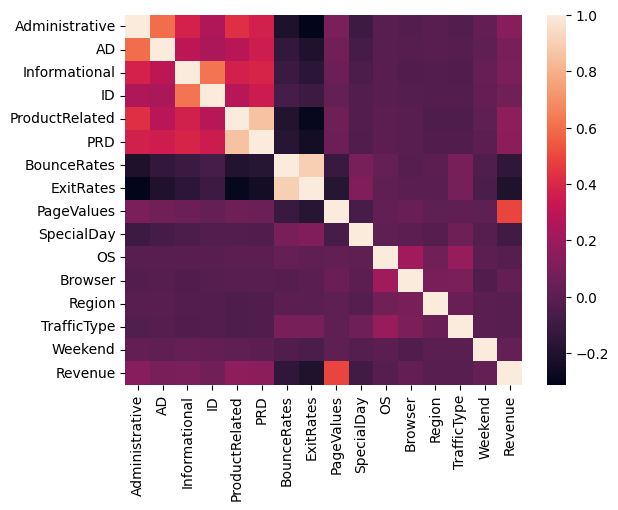

In [215]:
import seaborn as sns
sns.heatmap(corre_mtrx)

- Decision Tree

Decision Tree Rules:
|--- Month <= 6.50
|   |--- Month <= 0.50
|   |   |--- Weekend <= 0.50
|   |   |   |--- class: False
|   |   |--- Weekend >  0.50
|   |   |   |--- class: False
|   |--- Month >  0.50
|   |   |--- Weekend <= 0.50
|   |   |   |--- Month <= 1.50
|   |   |   |   |--- class: False
|   |   |   |--- Month >  1.50
|   |   |   |   |--- Month <= 2.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- Month >  2.50
|   |   |   |   |   |--- Month <= 3.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- Month >  3.50
|   |   |   |   |   |   |--- Month <= 5.50
|   |   |   |   |   |   |   |--- Month <= 4.50
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- Month >  4.50
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- Month >  5.50
|   |   |   |   |   |   |   |--- class: False
|   |   |--- Weekend >  0.50
|   |   |   |--- Month <= 2.50
|   |   |   |   |--- Month <= 1.50
|   |   |   |   |   |-

[Text(0.4739583333333333, 0.9444444444444444, 'Month <= 6.5\ngini = 0.264\nsamples = 12205\nvalue = [10297, 1908]'),
 Text(0.21875, 0.8333333333333334, 'Month <= 0.5\ngini = 0.204\nsamples = 8226\nvalue = [7279, 947]'),
 Text(0.34635416666666663, 0.8888888888888888, 'True  '),
 Text(0.08333333333333333, 0.7222222222222222, 'Weekend <= 0.5\ngini = 0.289\nsamples = 433\nvalue = [357, 76]'),
 Text(0.041666666666666664, 0.6111111111111112, 'gini = 0.308\nsamples = 337\nvalue = [273, 64]'),
 Text(0.125, 0.6111111111111112, 'gini = 0.219\nsamples = 96\nvalue = [84, 12]'),
 Text(0.3541666666666667, 0.7222222222222222, 'Weekend <= 0.5\ngini = 0.199\nsamples = 7793\nvalue = [6922, 871]'),
 Text(0.20833333333333334, 0.6111111111111112, 'Month <= 1.5\ngini = 0.19\nsamples = 6061\nvalue = [5415, 646]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.229\nsamples = 1345\nvalue = [1168, 177]'),
 Text(0.25, 0.5, 'Month <= 2.5\ngini = 0.179\nsamples = 4716\nvalue = [4247, 469]'),
 Text(0.20833333333333334,

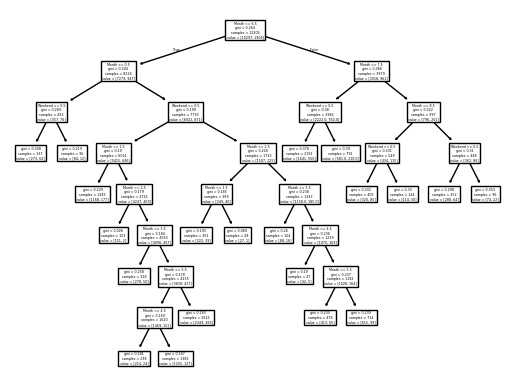

In [216]:
from matplotlib.pylab import rand
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

le_m = LabelEncoder()
le_vt = LabelEncoder()

df['Month'] = le_m.fit_transform(df['Month'])
df['VisitorType'] = le_vt.fit_transform(df['VisitorType'])

X = df[['Month','Weekend']]
Y = df['Revenue']

cl = DecisionTreeClassifier(random_state = 30)
cl.fit(X,Y)

from sklearn import tree
print("Decision Tree Rules:")
tree_rules = tree.export_text(cl, feature_names = ['Month','Weekend'])
print(tree_rules)
tree.plot_tree(cl, feature_names = ['Month','Weekend'])

## Classification Analysis

- Random Forest

Akurasi Model:  0.8914379352724293

Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      2062
        True       0.71      0.52      0.60       379

    accuracy                           0.89      2441
   macro avg       0.81      0.74      0.77      2441
weighted avg       0.88      0.89      0.88      2441



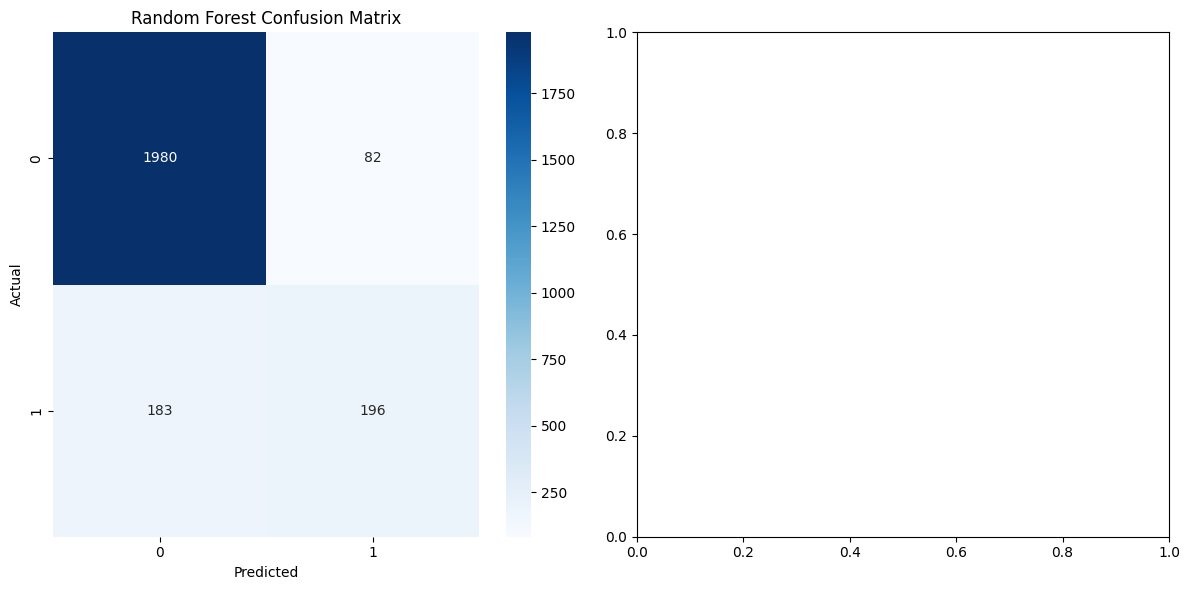

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Akurasi Model: ", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report: \n", classification_report(y_test, y_pred_rf))

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, fmt = 'd', cmap = 'Blues', ax = axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
plt.tight_layout()
plt.show()


- Logistic Regression

Akurasi Model Logistic Regression:  0.8705448586644817

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      2062
        True       0.66      0.34      0.45       379

    accuracy                           0.87      2441
   macro avg       0.78      0.65      0.69      2441
weighted avg       0.85      0.87      0.85      2441



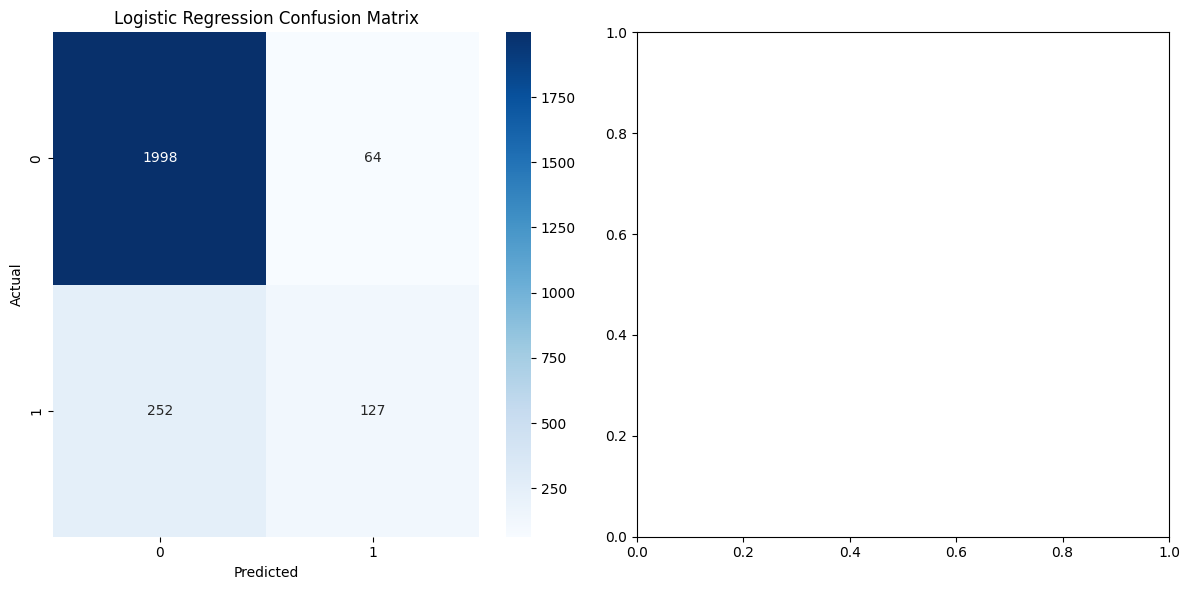

In [218]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lreg = LogisticRegression(max_iter = 1000)  
lreg.fit(X_train, y_train)

y_plreg = lreg.predict(X_test)

print("Akurasi Model Logistic Regression: ", accuracy_score(y_test, y_plreg))
print("\nClassification Report Logistic Regression: \n", classification_report(y_test, y_plreg))

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.heatmap(confusion_matrix(y_test, y_plreg), annot = True, fmt = 'd', cmap = 'Blues', ax = axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
plt.tight_layout()
plt.show()


## Training - Testing

- Metode Repeated Holdout

-> Random Forest

Iteration 1:
Akurasi: 0.9041
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2063
        True       0.76      0.56      0.64       378

    accuracy                           0.90      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441

--------------------------------------------------
Iteration 2:
Akurasi: 0.8976
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2032
        True       0.78      0.54      0.64       409

    accuracy                           0.90      2441
   macro avg       0.85      0.76      0.79      2441
weighted avg       0.89      0.90      0.89      2441

--------------------------------------------------
Iteration 3:
Akurasi: 0.9033
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2059
        True       0.77      0.54      0.64     

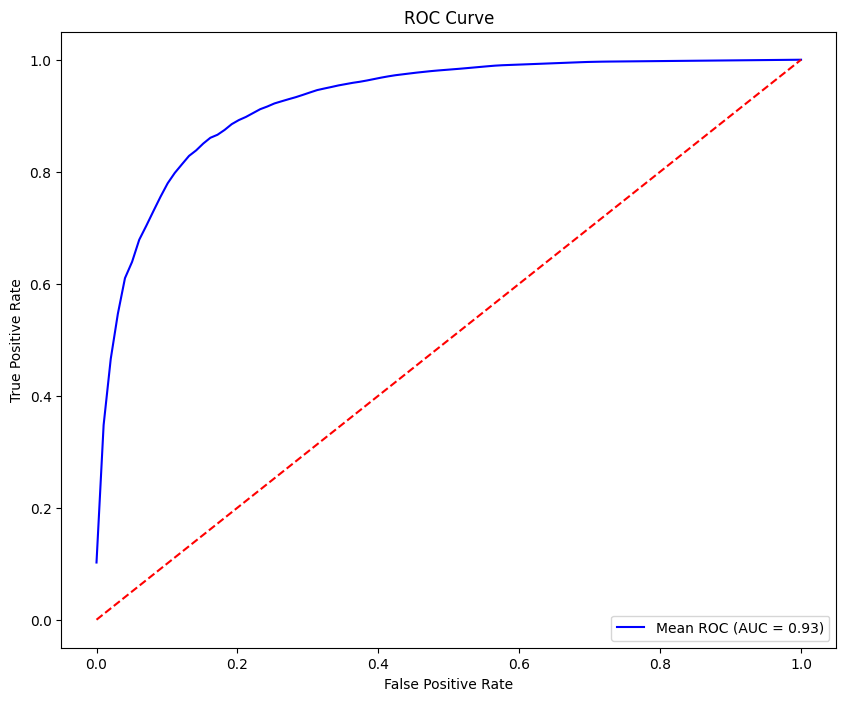

In [219]:
from sklearn.metrics import recall_score, roc_curve, auc

X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

k = 5 
accuracy_scores = []
all_fprrf1 = []
all_tprrf1 = []
mean_fprrf1 = np.linspace(0, 1, 100)

for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Iteration {i+1}:")
    print(f"Akurasi: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_predh = model.predict(X_test)
    y_pred_probh = model.predict_proba(X_test)[:, 1]
    
    fprrf1, tprrf1, thresholds = roc_curve(y_test, y_pred_probh)
    tpr_interrf1 = np.interp(mean_fprrf1, fprrf1, tprrf1)
    all_fprrf1.append(mean_fprrf1)
    all_tprrf1.append(tpr_interrf1)

avg_accuracyrf1 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {k} iterasi: {avg_accuracyrf1:.4f}")

recallrf1 = recall_score(y_test, y_pred)
print(f"Sensitivitas (Recall) Model: {recallrf1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificityrf1 = TN / (TN + FP)
print(f"Spesifisitas: {specificityrf1:.4f}")

mean_tprrf1 = np.mean(all_tprrf1, axis=0)
auc_scorerf1 = auc(mean_fprrf1, mean_tprrf1)
print(f"AUC Score: {auc_scorerf1:.4f}")

plt.figure(figsize=(10, 8))
plt.plot(mean_fprrf1, mean_tprrf1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf1)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()


-> Logistic Regression

Iteration 1:
Akurasi: 0.8828
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2063
        True       0.76      0.35      0.48       378

    accuracy                           0.88      2441
   macro avg       0.83      0.67      0.71      2441
weighted avg       0.87      0.88      0.86      2441

--------------------------------------------------
Iteration 2:
Akurasi: 0.8742
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2032
        True       0.77      0.36      0.49       409

    accuracy                           0.87      2441
   macro avg       0.83      0.67      0.71      2441
weighted avg       0.86      0.87      0.85      2441

--------------------------------------------------
Iteration 3:
Akurasi: 0.8751
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2059
        True       0.72      0.34      0.46     

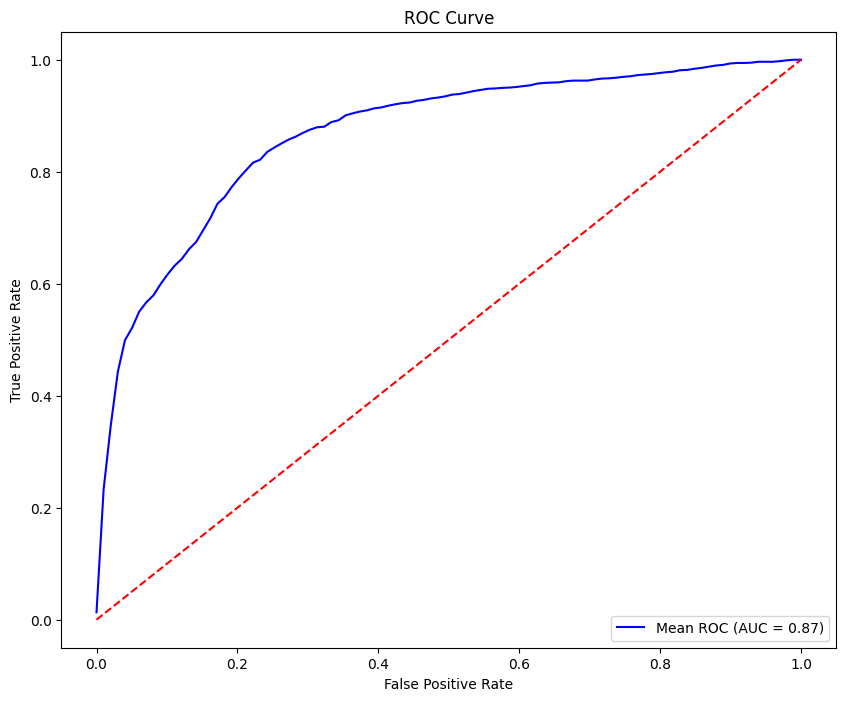

In [220]:
X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

k = 5 
accuracy_scores = []
all_fprlr1 = []
all_tprlr1 = []
mean_fprlr1 = np.linspace(0, 1, 100)

for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Iteration {i+1}:")
    print(f"Akurasi: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_predh = model.predict(X_test)
    y_pred_probh = model.predict_proba(X_test)[:, 1]
    
    fprlr1, tprlr1, thresholds = roc_curve(y_test, y_pred_probh)
    tpr_interlr1 = np.interp(mean_fprlr1, fprlr1, tprlr1)
    all_fprlr1.append(mean_fprlr1)
    all_tprlr1.append(tpr_interlr1)

avg_accuracylr1 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {k} iterasi: {avg_accuracylr1:.4f}")

from sklearn.metrics import recall_score
recalllr1 = recall_score(y_test,y_pred)
print(f"Sensitivitas (Recall) Model: {recalllr1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificitylr1 = TN / (TN + FP)
print(f"Spesifisitas: {specificitylr1:.4f}")

mean_tprlr1 = np.mean(all_tprlr1, axis = 0)
auc_scorelr1 = auc(mean_fprlr1, mean_tprlr1)
print(f"AUC Score: {auc_scorelr1:.4f}")

plt.figure(figsize = (10, 8))
plt.plot(mean_fprlr1, mean_tprlr1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr1)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

- Metode k-fold CV

-> Random Forest

Fold Accuracy: 0.9070
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2079
        True       0.75      0.56      0.64       362

    accuracy                           0.91      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.90      0.91      0.90      2441

--------------------------------------------------
Fold Accuracy: 0.9062
              precision    recall  f1-score   support

       False       0.93      0.96      0.95      2088
        True       0.71      0.59      0.65       353

    accuracy                           0.91      2441
   macro avg       0.82      0.78      0.80      2441
weighted avg       0.90      0.91      0.90      2441

--------------------------------------------------
Fold Accuracy: 0.9033
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2036
        True       0.76      0.61      0.68       405

    accuracy  

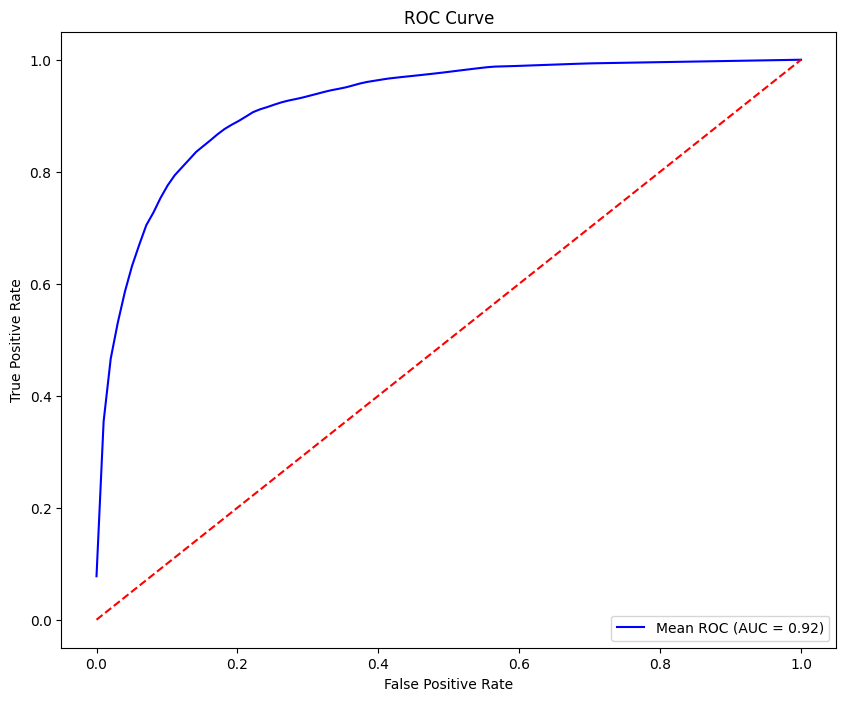

In [221]:
from sklearn.model_selection import KFold
X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

all_fprrf2 = []
all_tprrf2 = []
mean_fprrf2 = np.linspace(0, 1, 100)
accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    model = RandomForestClassifier(n_estimators = 100, random_state = 42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Fold Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fprrf2, tprrf2, thresholds = roc_curve(y_test, y_pred_prob)
    tpr_interrf2 = np.interp(mean_fprrf2, fprrf2, tprrf2)
    all_fprrf2.append(fprrf2)
    all_tprrf2.append(tpr_interrf2)

avg_accuracyrf2 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {kf.get_n_splits()} fold: {avg_accuracyrf2:.4f}")

recallrf2 = recall_score(y_test, y_pred)
print(f"Sensitivitas (Recall) Model: {recallrf2:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificityrf2 = TN / (TN + FP)
print(f"Spesifisitas: {specificityrf2:.4f}")

mean_tprrf2 = np.mean(all_tprrf2, axis = 0)
auc_scorerf2 = auc(mean_fprrf2, mean_tprrf2)
print(f"AUC Score: {auc_scorerf2:.4f}")

plt.figure(figsize = (10, 8))
plt.plot(mean_fprrf2, mean_tprrf2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()


-> Logistic Regression

Fold Accuracy: 0.8878
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2079
        True       0.75      0.36      0.49       362

    accuracy                           0.89      2441
   macro avg       0.82      0.67      0.71      2441
weighted avg       0.88      0.89      0.87      2441

--------------------------------------------------
Fold Accuracy: 0.8910
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2088
        True       0.72      0.40      0.52       353

    accuracy                           0.89      2441
   macro avg       0.81      0.69      0.73      2441
weighted avg       0.88      0.89      0.88      2441

--------------------------------------------------
Fold Accuracy: 0.8812
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2036
        True       0.78      0.40      0.52       405

    accuracy  

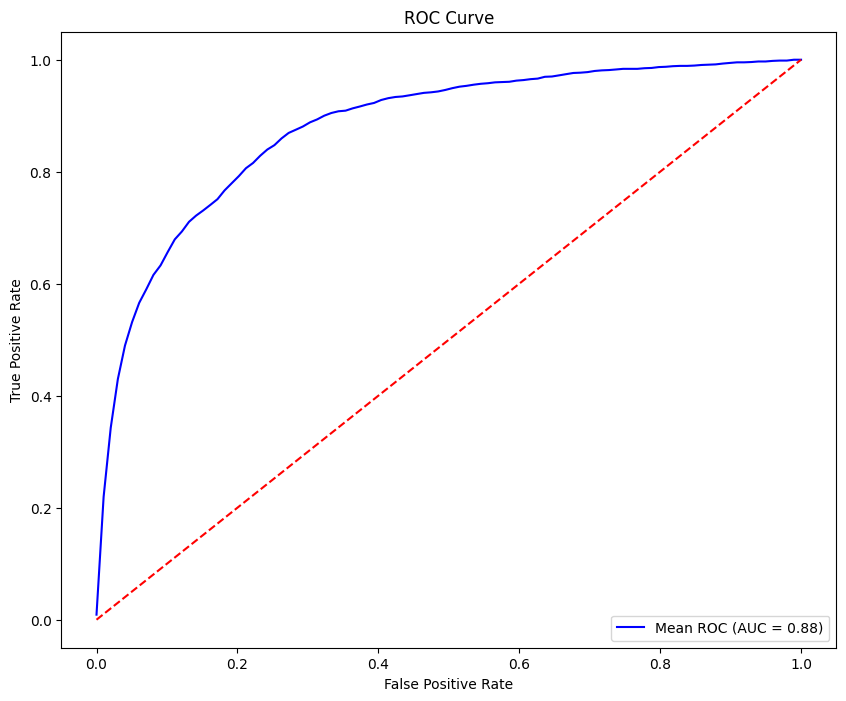

In [222]:
X = df[['Administrative', 'AD', 'Informational', 'ID', 'ProductRelated', 'PRD', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OS', 'Browser', 
        'Region', 'Month', 'TrafficType', 'VisitorType', 'Weekend']]
Y = df['Revenue']

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

all_fprlr2 = []
all_tprlr2 = []
mean_fprlr2 = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Fold Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fprlr2, tprlr2, thresholds = roc_curve(y_test, y_pred_prob)
    tpr_interlr2 = np.interp(mean_fprlr2, fprlr2, tprlr2)
    all_fprlr2.append(mean_fprlr2)
    all_tprlr2.append(tpr_interlr2)

avg_accuracylr2 = np.mean(accuracy_scores)
print(f"\nRata-rata Akurasi dari {kf.get_n_splits()} fold: {avg_accuracylr2:.4f}")

recalllr2 = recall_score(y_test,y_pred)
print(f"Sensitivitas (Recall) Model: {recalllr2:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]

specificitylr2 = TN / (TN + FP)
print(f"Spesifisitas: {specificitylr2:.4f}")

mean_tprlr2 = np.mean(all_tprlr2, axis = 0)
auc_scorelr2 = auc(mean_fprlr2, mean_tprlr2)
print(f"AUC Score: {auc_scorelr2:.4f}")

plt.figure(figsize = (10, 8))
plt.plot(mean_fprlr2, mean_tprlr2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

## Evaluasi Metriks

- Akurasi

In [223]:
# Akurasi menggunakan Repeated Holdout:
print(f"Rata-rata Akurasi dari {k} iterasi Random Forest: {avg_accuracyrf1:.4f}")
print(f"Rata-rata Akurasi dari {k} iterasi Logistic Regression: {avg_accuracylr1:.4f}")

#Akurasi menggunakan kFold CV
print(f"Rata-rata Akurasi dari {kf.get_n_splits()} Fold Random Forest: {avg_accuracyrf2:.4f}")
print(f"Rata-rata Akurasi dari {kf.get_n_splits()} Fold Logistic Regression: {avg_accuracylr2:.4f}")

Rata-rata Akurasi dari 5 iterasi Random Forest: 0.9032
Rata-rata Akurasi dari 5 iterasi Logistic Regression: 0.8813
Rata-rata Akurasi dari 5 Fold Random Forest: 0.9027
Rata-rata Akurasi dari 5 Fold Logistic Regression: 0.8923


- Sensitivitas

In [224]:
# Sensitivitas menggunakan Repeated Holdout
print(f"Sensitivitas (Recall) Model Repeated Holdout Random Forest: {recallrf1:.4f}")
print(f"Sensitivitas (Recall) Model Repeated Holdout Logistic Regression: {recalllr1:.4f}")

# Sensitivitas menggunakan kFold CV
print(f"Sensitivitas (Recall) Model kFold Random Forest: {recallrf2:.4f}")
print(f"Sensitivitas (Recall) Model kFold Logistic Regression: {recalllr2:.4f}")

Sensitivitas (Recall) Model Repeated Holdout Random Forest: 0.5893
Sensitivitas (Recall) Model Repeated Holdout Logistic Regression: 0.3627
Sensitivitas (Recall) Model kFold Random Forest: 0.6034
Sensitivitas (Recall) Model kFold Logistic Regression: 0.3670


- Spesifisitas

In [225]:
# Spesifisitas menggunakan Repeated Holdout
print(f"Spesifisitas Repeated Holdout Random Forest: {specificityrf1:.4f}")
print(f"Spesifisitas Repeated Holdout Logistic Regression: {specificitylr1:.4f}")

# Spesifisitas menggunakan kFold CV
print(f"Spesifisitas kFold Random Forest: {specificityrf2:.4f}")
print(f"Spesifisitas kFold Logistic Regression: {specificitylr2:.4f}")

Spesifisitas Repeated Holdout Random Forest: 0.9656
Spesifisitas Repeated Holdout Logistic Regression: 0.9748
Spesifisitas kFold Random Forest: 0.9631
Spesifisitas kFold Logistic Regression: 0.9803


- ROC

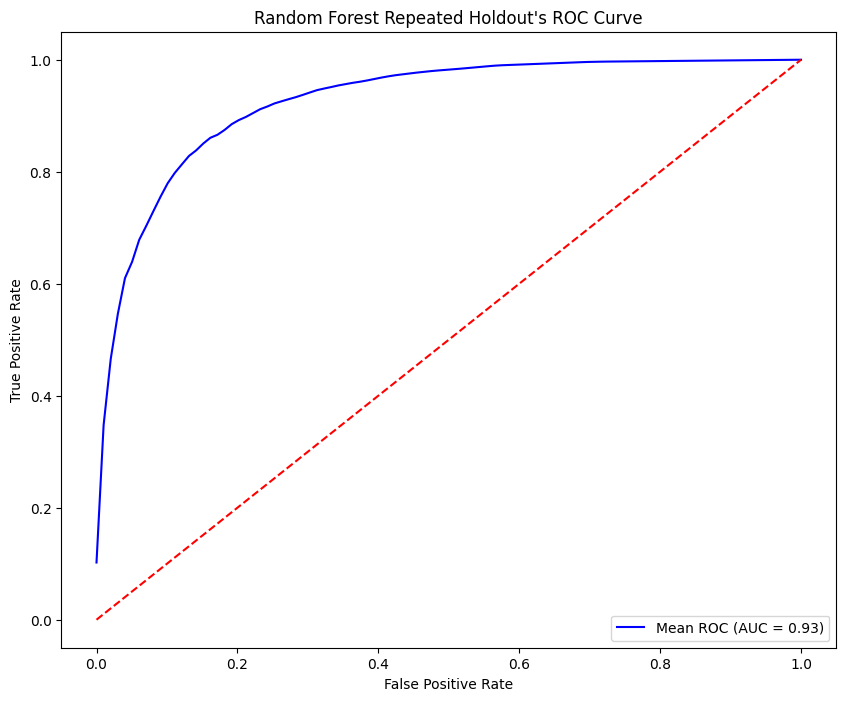

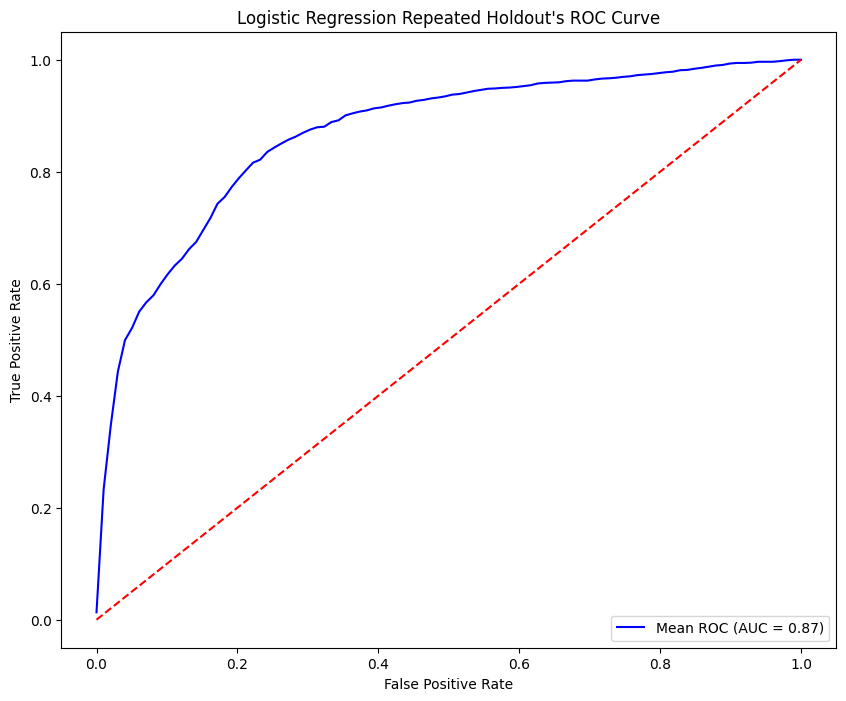

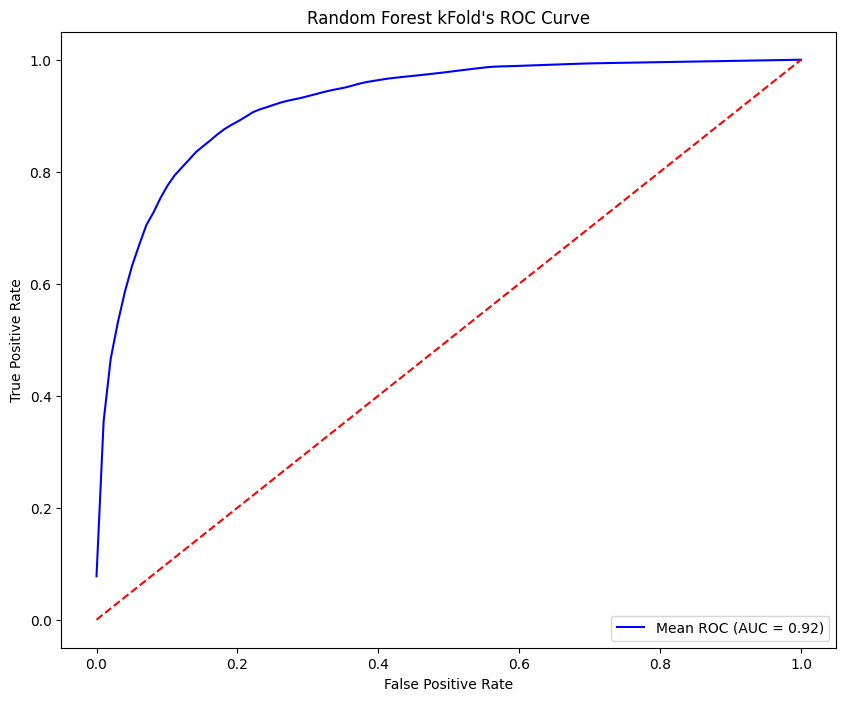

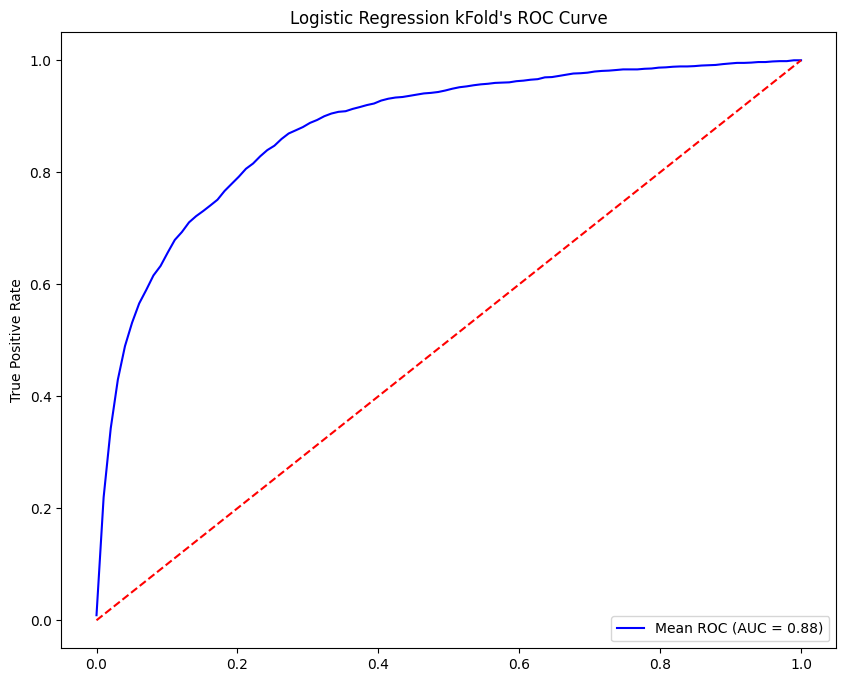

In [226]:
# Kurva ROC untuk Repeated Holdout
plt.figure(figsize = (10, 8))
plt.plot(mean_fprrf1, mean_tprrf1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf1)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest Repeated Holdout's ROC Curve")
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize = (10, 8))
plt.plot(mean_fprlr1, mean_tprlr1, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr1)
plt.plot([0, 1], [0, 1], color='r', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logistic Regression Repeated Holdout's ROC Curve")
plt.legend(loc='lower right')
plt.show()

# Kurva ROC untuk kFold
plt.figure(figsize = (10, 8))
plt.plot(mean_fprrf2, mean_tprrf2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorerf2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest kFold's ROC Curve")
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(mean_fprlr2, mean_tprlr2, color = 'b', label = 'Mean ROC (AUC = %0.2f)' % auc_scorelr2)
plt.plot([0, 1], [0, 1], color = 'r', linestyle = '--')  
plt.ylabel('True Positive Rate')
plt.title("Logistic Regression kFold's ROC Curve")
plt.legend(loc = 'lower right')
plt.show()

- AUC

In [227]:
# Nilai AUC untuk Repeated Holdout
print(f"Random Forest Repeated Holdout's AUC Score: {auc_scorerf1:.4f}")
print(f"Logistic Regression Repeated Holdout's AUC Score: {auc_scorelr1:.4f}")

# Nilai AUC untuk kFold
print(f"Random Forest kFold's AUC Score: {auc_scorerf2:.4f}")
print(f"Logistic Regression kFold's AUC Score: {auc_scorelr2:.4f}")

Random Forest Repeated Holdout's AUC Score: 0.9258
Logistic Regression Repeated Holdout's AUC Score: 0.8674
Random Forest kFold's AUC Score: 0.9228
Logistic Regression kFold's AUC Score: 0.8789
